In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
from caffeine import EEGProcessing
from matplotlib import pyplot as plt

In [3]:
CAF_DOSE = 200

FEATURE_PATH = 'C:\\Users\\Philipp\\Documents\\Caffeine\\Features{dose}\\Combined'.format(dose=CAF_DOSE)
SUBJECTS_PATH = '..\\data\\CAF_{dose}_Inventaire.csv'.format(dose=CAF_DOSE)
DATA_PATH = 'E:\\Cafeine_data\\CAF_{dose}\\EEG_data\\'.format(dose=CAF_DOSE)

STAGES = ['AWA', 'AWSL', 'NREM', 'REM']

In [4]:
with open(os.path.join(FEATURE_PATH, 'data.pickle'), 'rb') as file:
    data = pickle.load(file)
with open(os.path.join(FEATURE_PATH, 'groups.pickle'), 'rb') as file:
    groups = pickle.load(file)
with open(os.path.join(FEATURE_PATH, 'labels.pickle'), 'rb') as file:
    labels = pickle.load(file)

In [5]:
for stage in STAGES:
    print(stage)
    print('    subjects:', len(np.unique(groups[stage])))
    print('    samples:', sum([len(groups[stage][groups[stage]==current]) for current in np.unique(groups[stage])]))

AWA
    subjects: 40
    samples: 9686
AWSL
    subjects: 40
    samples: 6992
NREM
    subjects: 40
    samples: 57594
REM
    subjects: 40
    samples: 19341


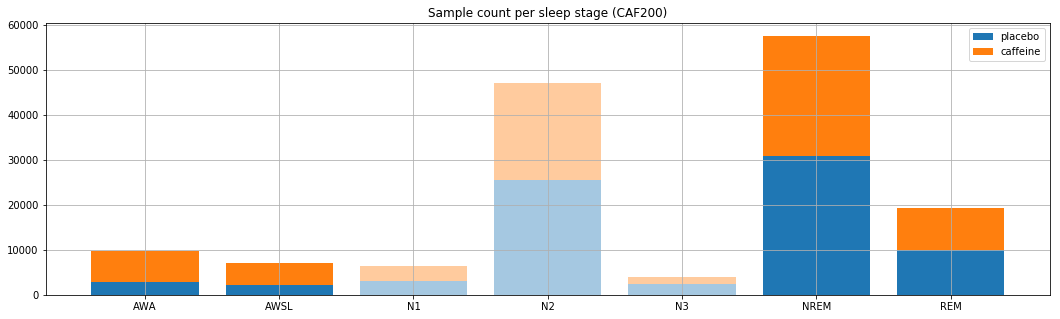

In [6]:
unused_alpha = 0.4

amounts_plac = dict([(stage, current['SampEn'][labels[stage]==0].shape[0]) for stage, current in data.items()])
amounts_caff = dict([(stage, current['SampEn'][labels[stage]==1].shape[0]) for stage, current in data.items()])

values_plac = np.array(list(amounts_plac.values()))
values_caff = np.array(list(amounts_caff.values()))

used_stages_mask = np.array([1, 1, 0, 0, 0, 1, 1]).astype(np.bool)
unused_stages_mask = np.array([0, 0, 1, 1, 1, 0, 0]).astype(np.bool)

plt.figure(figsize=(18, 5))
plt.title(f'Sample count per sleep stage (CAF{CAF_DOSE})')

color_plac = plt.bar(np.arange(len(amounts_plac))[used_stages_mask], values_plac[used_stages_mask], label='placebo')[0].get_facecolor()
color_caff = plt.bar(np.arange(len(amounts_caff))[used_stages_mask], values_caff[used_stages_mask], bottom=values_plac[used_stages_mask], label='caffeine')[0].get_facecolor()

color_plac = list(color_plac)[:-1] + [unused_alpha]
color_caff = list(color_caff)[:-1] + [unused_alpha]

plt.bar(np.arange(len(amounts_plac))[unused_stages_mask], values_plac[unused_stages_mask], color=color_plac)
plt.bar(np.arange(len(amounts_caff))[unused_stages_mask], values_caff[unused_stages_mask], bottom=values_plac[unused_stages_mask], color=color_caff)

plt.xticks(np.arange(len(amounts_plac)), amounts_plac.keys())
plt.legend()
plt.grid()
plt.show()

In [7]:
subjects = pd.read_csv(SUBJECTS_PATH, index_col=0)
subject_ids = subjects['Subject_id']

In [8]:
hypnograms = {}
for subject_id in subject_ids:
    hyp_path = os.path.join(DATA_PATH, subject_id, 'hyp_clean.npy')
    hypnograms[subject_id] = np.load(hyp_path)

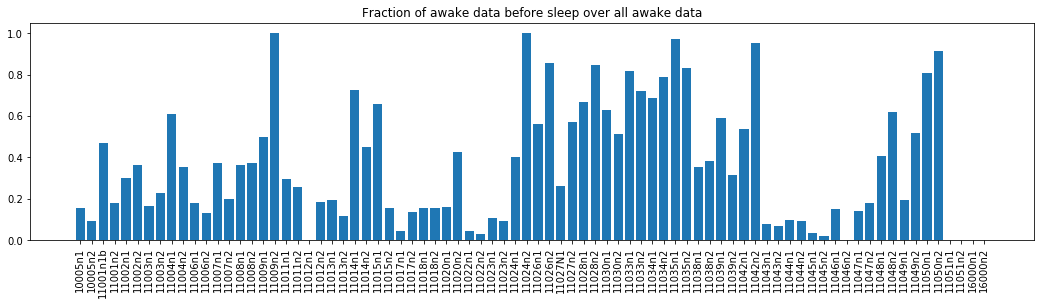

In [9]:
fractions = {}
for subject_id, hyp in hypnograms.items():
    fractions[subject_id] = np.where(hyp != 0)[0][0] / np.sum(hyp == 0)

plt.figure(figsize=(18, 4))
plt.title('Fraction of awake data before sleep over all awake data')
plt.bar(np.arange(len(fractions)), fractions.values())
plt.xticks(np.arange(len(fractions)), fractions.keys(), rotation=90)
plt.show()

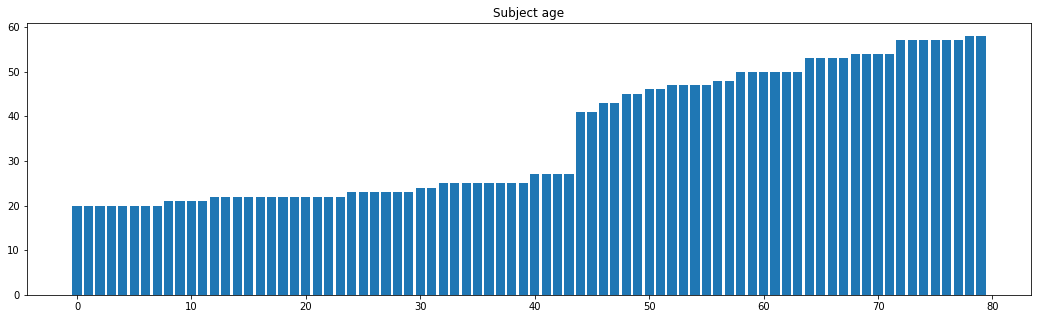

min: 20
max: 58
mean: 35.275
std: 14.307318931232365
median: 26.0


In [10]:
plt.figure(figsize=(18, 5))
plt.title('Subject age')
plt.bar(np.arange(len(subjects)), sorted(subjects['Age']))
plt.show()

print('min:', np.min(subjects['Age']))
print('max:', np.max(subjects['Age']))
print('mean:', np.mean(subjects['Age']))
print('std:', np.std(subjects['Age']))
print('median:', np.median(subjects['Age']))